# MNIST 데이터셋에 t-SNE 알고리즘을 사용하여 2차원으로 축소한 후 시각화하기
그 다음 PCA, LLE, MDS같은 차원 축소 알고리즘도 적용해보고 시각화를 비교하기.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
x, y = mnist["data"], mnist["target"]
x_train, x_test = x[: 60000], x[60000: ]
y_train, y_test = y[: 60000], y[60000: ]

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

In [19]:
import pandas as pd

temp_x = x_train[: 10000]
temp_y = pd.to_numeric(y_train[: 10000])

In [36]:
import time

t1 = time.time()
temp_x_re = tsne.fit_transform(temp_x)
t2 = time.time()
print(t2 - t1)

34.32472515106201


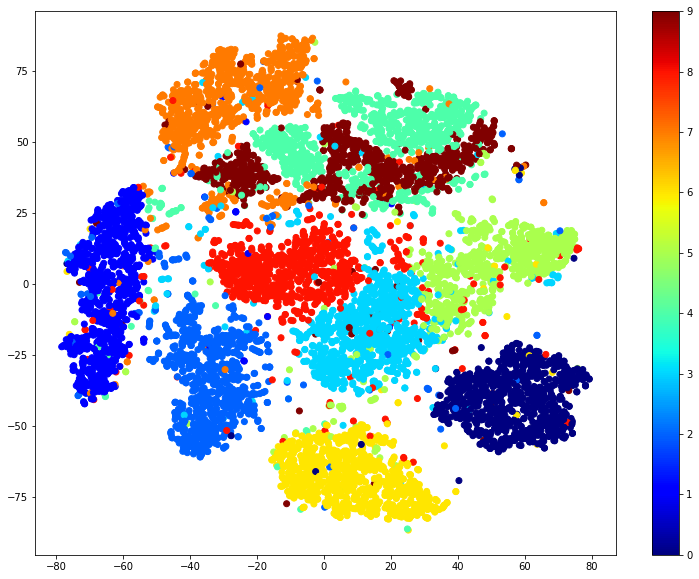

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.scatter(temp_x_re[:, 0], temp_x_re[:, 1], c=temp_y.to_numpy(), cmap="jet")
plt.colorbar()

오, 뭔가 확실하진 않지만 구별은 되는 듯??

In [30]:
import numpy as np
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 입력 특성의 스케일을 0에서 1 사이로 만듭니다.
    X_normalized = MinMaxScaler().fit_transform(X)
    # 그릴 숫자의 좌표 목록을 만듭니다.
    # 반복문 아래에서 `if` 문장을 쓰지 않기 위해 시작할 때 이미 그래프가 그려져 있다고 가정합니다.
    neighbors = np.array([[10., 10.]])
    # 나머지는 이해하기 쉽습니다.
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # 현재 그래프의 축을 가져옵니다.
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

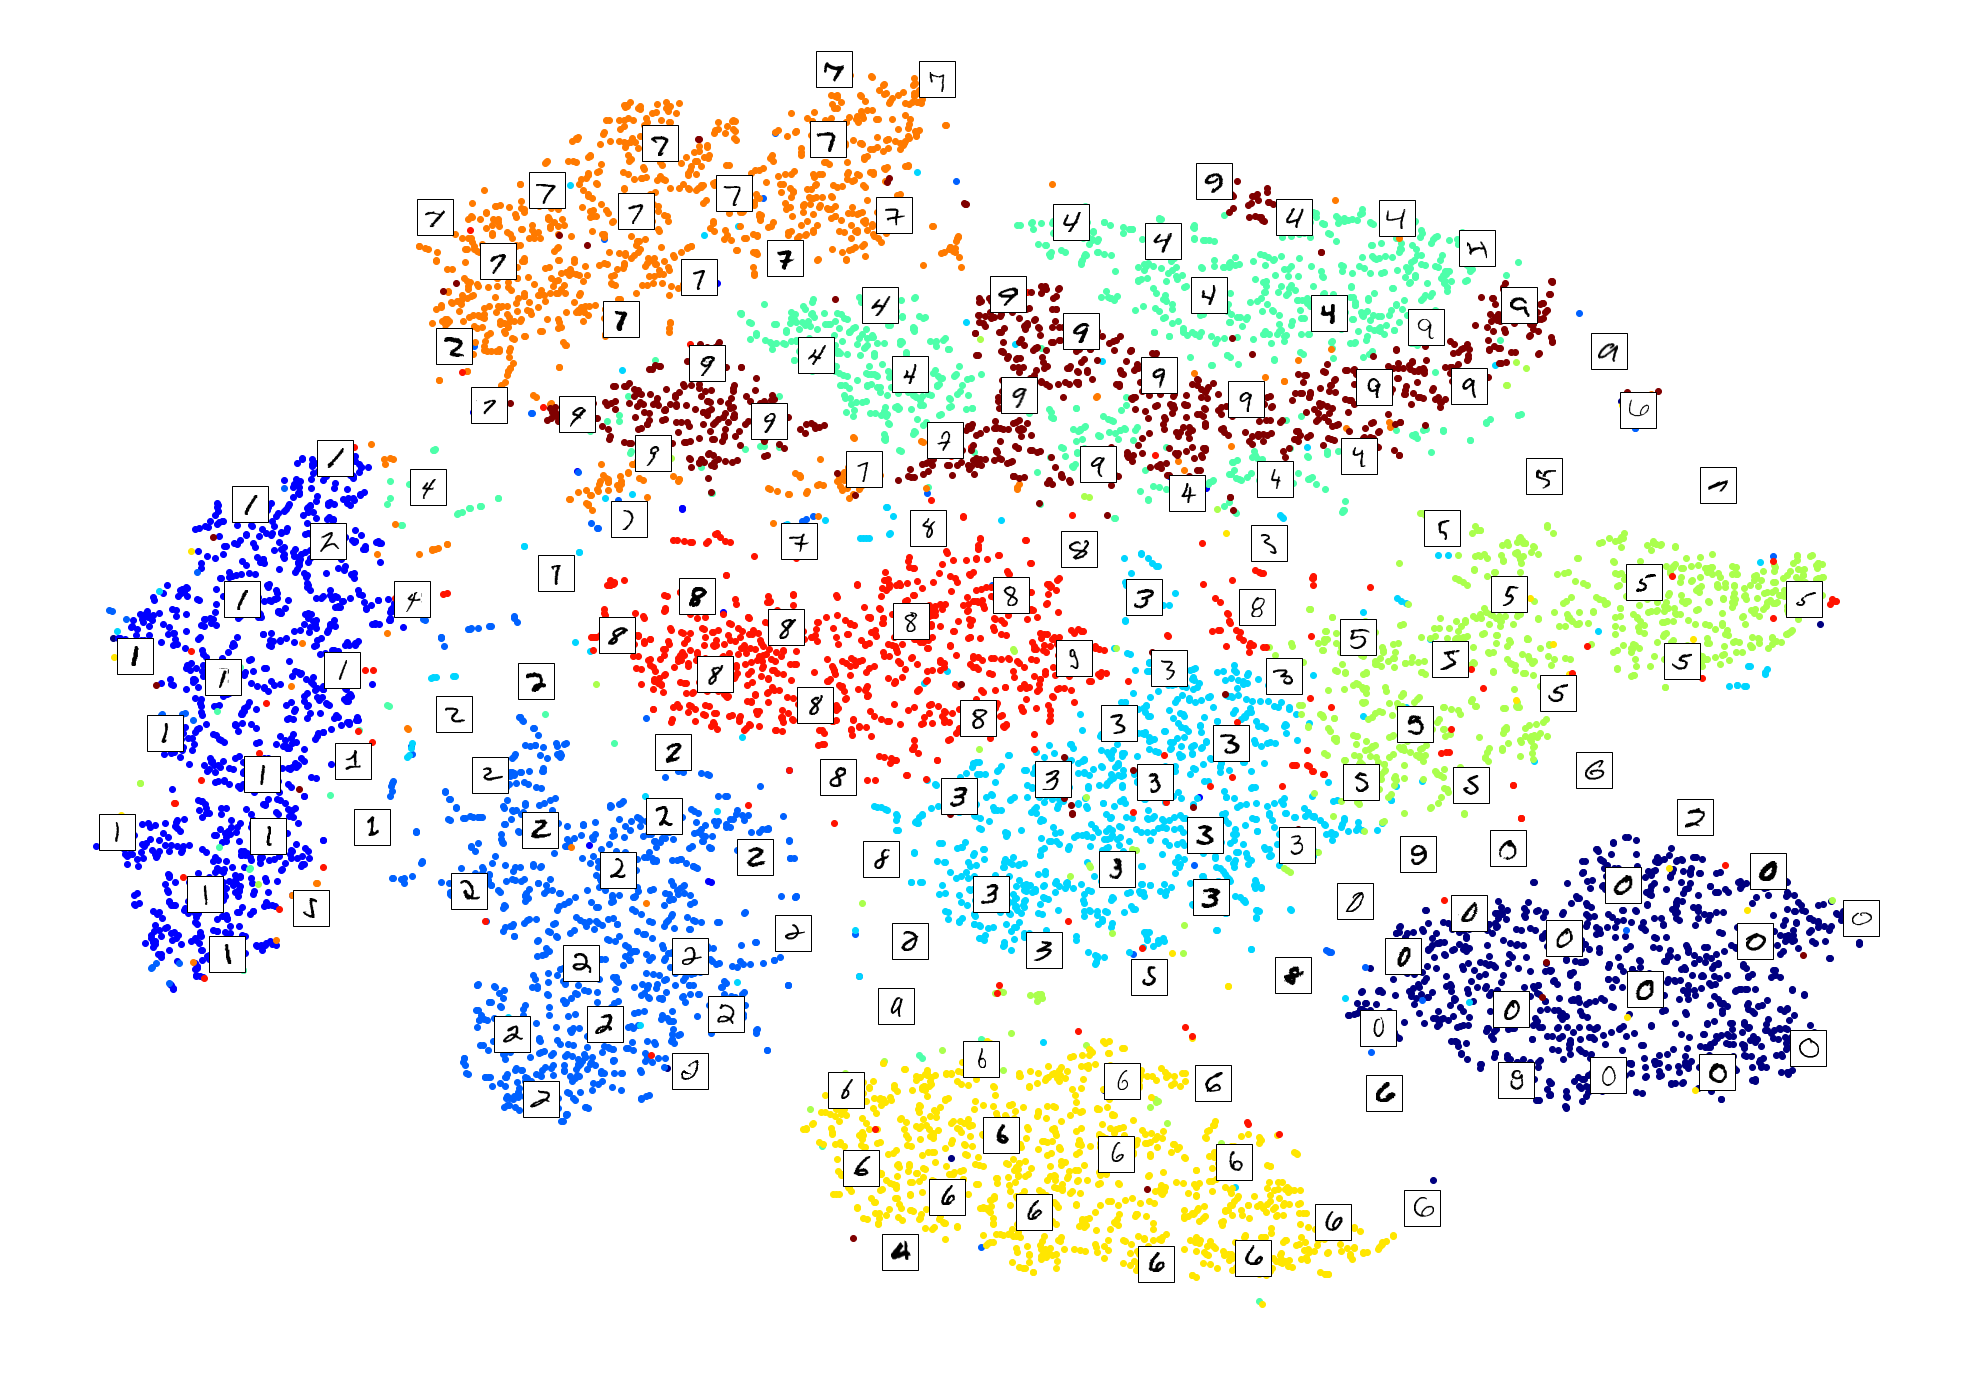

In [33]:
plot_digits(temp_x_re, temp_y, images=temp_x.to_numpy(), figsize=(35, 25))

해당 클래스에 해당하는 그림도 같이 그래프에 띄운 모습.  
매우 보여주기 좋은 자료인 듯.

---
## PCA로 차원 축소한 뒤 시각화 해보기

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

t1 = time.time()
temp_x_pca = pca.fit_transform(temp_x)
t2 = time.time()
print(t2 - t1)

0.2200489044189453


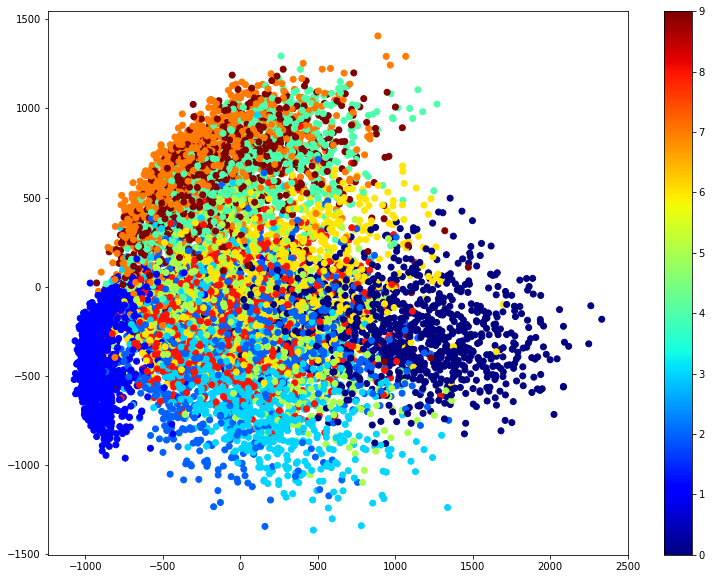

In [43]:
plt.figure(figsize=(13, 10))
plt.scatter(temp_x_pca[:, 0], temp_x_pca[:, 1], c=temp_y.to_numpy(), cmap="jet")
plt.colorbar()

---
## LLE

In [38]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)

t1 = time.time()
temp_x_lle = lle.fit_transform(temp_x)
t2 = time.time()
print(t2 - t1)

31.413692235946655


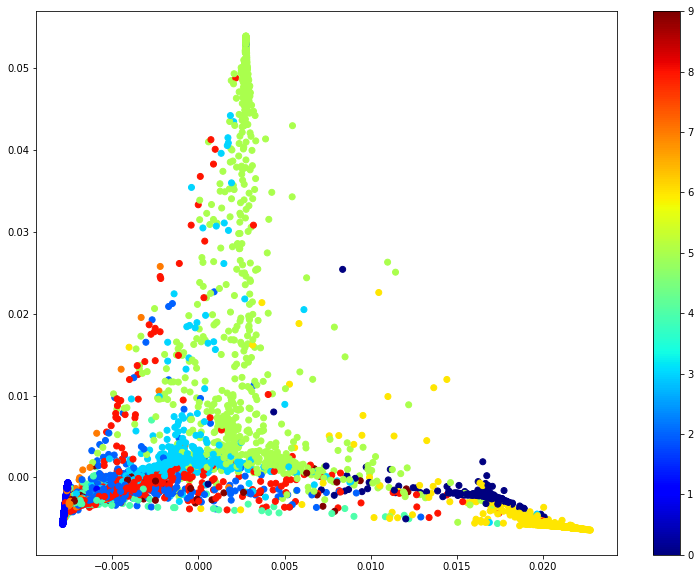

In [44]:
plt.figure(figsize=(13, 10))
plt.scatter(temp_x_lle[:, 0], temp_x_lle[:, 1], c=temp_y.to_numpy(), cmap="jet")
plt.colorbar()

---
## PCA + LLE

In [40]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42))
])

t1 = time.time()
temp_x_pca_lle = pca_lle.fit_transform(temp_x)
t2 = time.time()
print(t2 - t1)

27.819799661636353


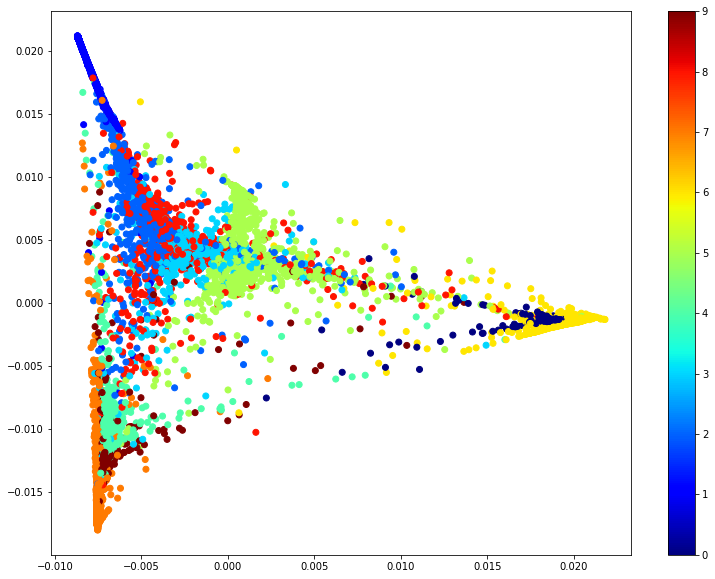

In [45]:
plt.figure(figsize=(13, 10))
plt.scatter(temp_x_pca_lle[:, 0], temp_x_pca_lle[:, 1], c=temp_y.to_numpy(), cmap="jet")
plt.colorbar()

---
## MDS

In [48]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)

t1 = time.time()
temp_x_mds = mds.fit_transform(temp_x[: 1000])
t2 = time.time()
print(t2 - t1)

28.836650609970093


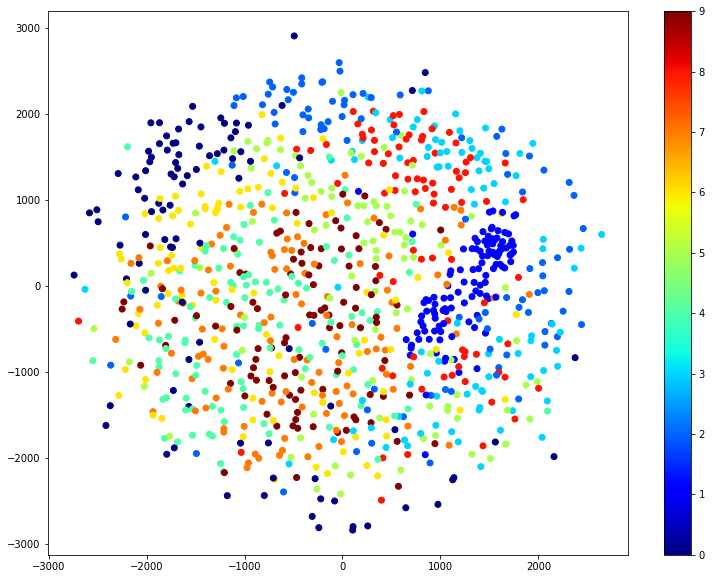

In [50]:
plt.figure(figsize=(13, 10))
plt.scatter(temp_x_mds[:, 0], temp_x_mds[:, 1], c=temp_y[:1000].to_numpy(), cmap="jet")
plt.colorbar()

10000개의 샘플을 갖고 해봤는데 거의 1시간 동안 먹통이었음.  
샘플수에 따른 계산 복잡도가 어마어마한 모양.  
그리고 축소한 모양새도 각 클래스를 분류할 때 쓰기엔 적합하지 않아보임.

---
## LDA

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

t1 = time.time()
temp_x_lda = lda.fit_transform(temp_x, temp_y)
t2 = time.time()
print(t2 - t1)

1.590358018875122


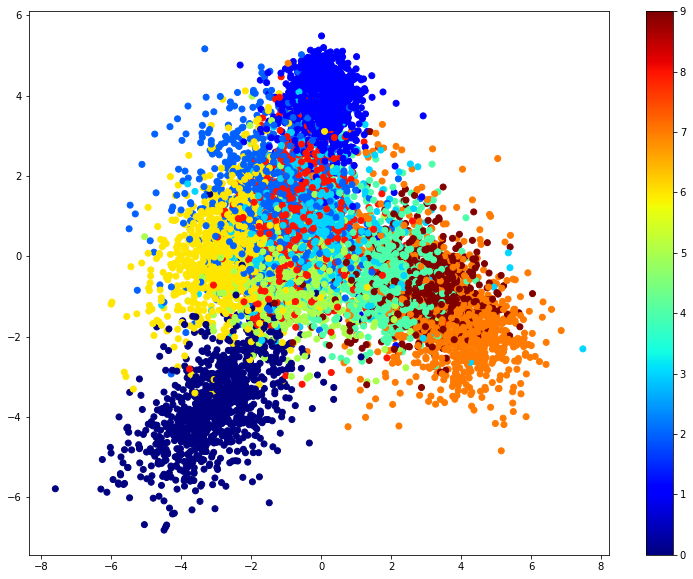

In [53]:
plt.figure(figsize=(13, 10))
plt.scatter(temp_x_lda[:, 0], temp_x_lda[:, 1], c=temp_y.to_numpy(), cmap="jet")
plt.colorbar()